# GatherRisk

## Variables

| Variable | Meaning | Possible Values | Explanation |
| - | - | - | - |
| $\text{mf}_{i,j}$ | Face mask fit for individual $i$ at time $j$. | 0, 0.5, 0.9, 1 | 1 is perfect fit, 0 is no fit |
| $\text{me}_{i,j}$ | Face mask efficiency for individual $i$ at time $j$. | 0, 0.3, 0.9, 0.95, 0.99 | 0.99 is really good efficiency, 0.95 is the minimum for N95 masks, 0.3 is effectiveness of cloth masks, 0 is if not wearing a mask |
| $\text{id}_{i,j}$ | Amount of viral particles that are inhaled by individual $i$ at time $j$ | ... | 
| $\text{it}$ | Infection threshold | ? |
| $\text{di}_{i,j}$ | Day of infection | 1-14 or Susceptible | If person just got infected, and the individual is susceptible, then this resets to 1. |
| $\text{nmi}_{i,j}$ | Number of masked, infected individuals that are seen by individual $i$ | 0, 1, ..., 30 |
| $\text{imf}_{i,j}$ | Average mask fit of infected that individual $i$ was exposed to at time $j$. | 0, 0.5, 0.9, 1 | 1 is perfect fit, 0 is no fit |
| $\text{ime}_{i,j}$ | Average mask filtration efficiency of infected that individual $i$ was exposed to at time $j$. | 0, 0.3, 0.9, 0.95, 0.99 | 0.99 is really good efficiency, 0.95 is the minimum for N95 masks, 0.3 is effectiveness of cloth masks, 0 is if not wearing a mask |

In [1]:
import sys 

In [2]:
sys.path.insert(0, "/Users/eugaddan/Developer/linx")

In [3]:
import logging

import numpy as np
import pandas as pd
import graphviz
import matplotlib.pyplot as plt

from linx.misc import get_version, get_tmp_path, clean_tmp
from linx.examples.covid_safe import (
    create_dose_pair,
    create_doses,
    create_dose_from_people,
    create_dose_from_strangers, name, index_name,
    create_longitudinal,
    create_room_event,
    create_inf_dsi_viral_load_measurements
)


from linx.ds import BayesianNetwork as BN, \
    ConditionalProbabilityTable as CPT
from linx.query import Query
from linx.data import InMemoryData, ParquetData
from linx.infer import VariableElimination as VE


In [4]:
from scipy.stats import nbinom

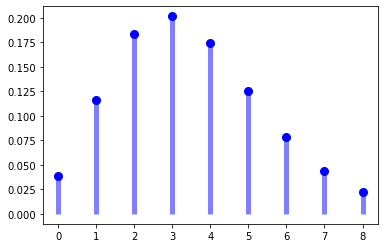

In [5]:
#neg_binom = nbinom(n=20, p=0.1)
fig, ax = plt.subplots()
n = 20
p = 0.85
x = np.arange(nbinom.ppf(0.01, n, p),
              nbinom.ppf(0.99, n, p))
ax.plot(x, nbinom.pmf(x, n, p), 'bo', ms=8, label='nbinom pmf')
ax.vlines(x, 0, nbinom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

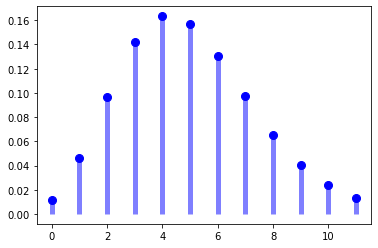

In [6]:
#neg_binom = nbinom(n=20, p=0.1)
fig, ax = plt.subplots()
n = 20
p = 0.8
x = np.arange(nbinom.ppf(0.01, n, p),
              nbinom.ppf(0.99, n, p))
ax.plot(x, nbinom.pmf(x, n, p), 'bo', ms=8, label='nbinom pmf')
ax.vlines(x, 0, nbinom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

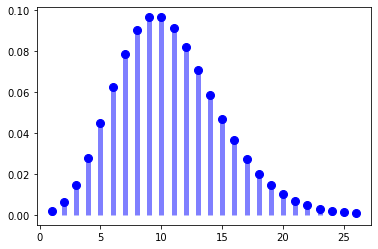

In [7]:
#neg_binom = nbinom(n=20, p=0.1)
fig, ax = plt.subplots()
n = 16
p = 0.6
x = np.arange(nbinom.ppf(0.001, n, p),
              nbinom.ppf(0.999, n, p))
ax.plot(x, nbinom.pmf(x, n, p), 'bo', ms=8, label='nbinom pmf')
ax.vlines(x, 0, nbinom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

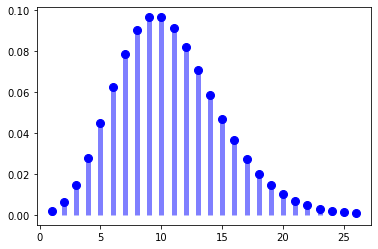

In [8]:
#neg_binom = nbinom(n=20, p=0.1)
fig, ax = plt.subplots()
 
ax.plot(x, nbinom.pmf(x, n, p), 'bo', ms=8, label='nbinom pmf')
ax.vlines(x, 0, nbinom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

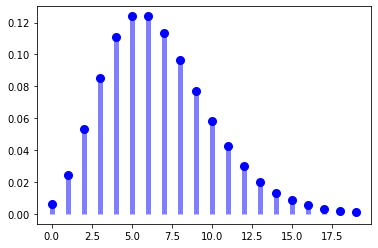

In [9]:
#neg_binom = nbinom(n=20, p=0.1)
fig, ax = plt.subplots()
n = 10
p = 0.6
x = np.arange(nbinom.ppf(0.001, n, p),
              nbinom.ppf(0.999, n, p))
ax.plot(x, nbinom.pmf(x, n, p), 'bo', ms=8, label='nbinom pmf')
ax.vlines(x, 0, nbinom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

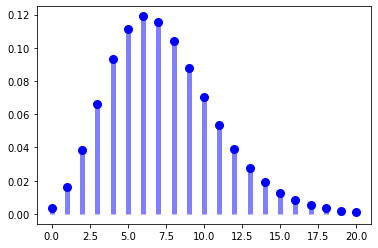

In [10]:
#neg_binom = nbinom(n=20, p=0.1)
fig, ax = plt.subplots()
n = 11
p = 0.6
x = np.arange(nbinom.ppf(0.001, n, p),
              nbinom.ppf(0.999, n, p))
ax.plot(x, nbinom.pmf(x, n, p), 'bo', ms=8, label='nbinom pmf')
ax.vlines(x, 0, nbinom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

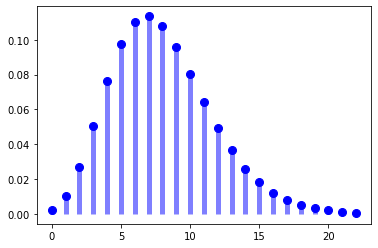

In [11]:
#neg_binom = nbinom(n=20, p=0.1)
fig, ax = plt.subplots()
n = 12
p = 0.6
x = np.arange(nbinom.ppf(0.001, n, p),
              nbinom.ppf(0.999, n, p))
ax.plot(x, nbinom.pmf(x, n, p), 'bo', ms=8, label='nbinom pmf')
ax.vlines(x, 0, nbinom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

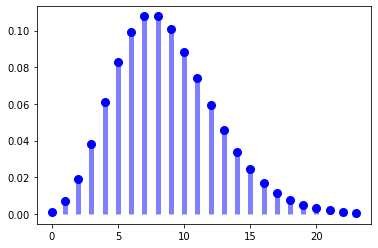

In [12]:
#neg_binom = nbinom(n=20, p=0.1)
fig, ax = plt.subplots()
n = 13
p = 0.6
x = np.arange(nbinom.ppf(0.001, n, p),
              nbinom.ppf(0.999, n, p))
ax.plot(x, nbinom.pmf(x, n, p), 'bo', ms=8, label='nbinom pmf')
ax.vlines(x, 0, nbinom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

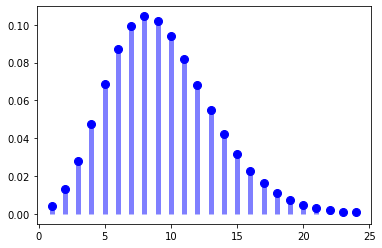

In [13]:
#neg_binom = nbinom(n=20, p=0.1)
fig, ax = plt.subplots()
n = 14
p = 0.6
x = np.arange(nbinom.ppf(0.001, n, p),
              nbinom.ppf(0.999, n, p))
ax.plot(x, nbinom.pmf(x, n, p), 'bo', ms=8, label='nbinom pmf')
ax.vlines(x, 0, nbinom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

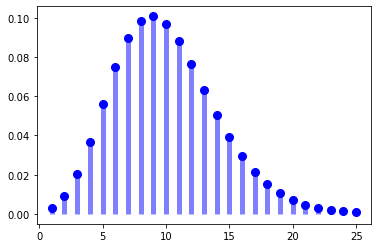

In [14]:
#neg_binom = nbinom(n=20, p=0.1)
fig, ax = plt.subplots()
n = 15
p = 0.6
x = np.arange(nbinom.ppf(0.001, n, p),
              nbinom.ppf(0.999, n, p))
ax.plot(x, nbinom.pmf(x, n, p), 'bo', ms=8, label='nbinom pmf')
ax.vlines(x, 0, nbinom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

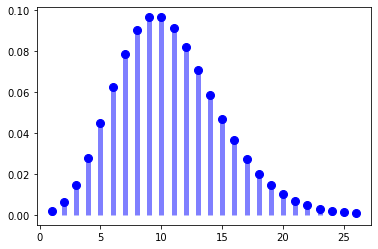

In [15]:
#neg_binom = nbinom(n=20, p=0.1)
fig, ax = plt.subplots()
n = 16
p = 0.6
x = np.arange(nbinom.ppf(0.001, n, p),
              nbinom.ppf(0.999, n, p))
ax.plot(x, nbinom.pmf(x, n, p), 'bo', ms=8, label='nbinom pmf')
ax.vlines(x, 0, nbinom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

In [16]:
nbinom.pmf(x, n, p)

array([0.00180551, 0.00613874, 0.01473296, 0.02799263, 0.04478821,
       0.0627035 , 0.07882725, 0.09065134, 0.09669476, 0.09669476,
       0.0914205 , 0.08227845, 0.07088605, 0.05873416, 0.04698733,
       0.03641518, 0.02741849, 0.02010689, 0.0143923 , 0.01007461,
       0.0069083 , 0.0046474 , 0.00307133, 0.00199636, 0.00127767,
       0.00080592])

In [17]:
bayesian_network_1 = BN(graphviz_dag=graphviz.Digraph())

person = 'edderic'

dates = pd.date_range(start='02/23/2022', end='02/23/2022')

date = dates[0].strftime('%m-%d-%y')
date_person_event_suffix = index_name(date, person, 'work')
date_event_others_to_person = index_name(date, 'work', 'others', person)
date_event_self_suffix = index_name(date, 'work', person)
date_self_suffix = index_name(date, person)
date_event_suffix = index_name(date, 'work')
day_index = index_name(date)
self_suffix = index_name(person)
outcome_col = f"dsi_{date_self_suffix}"

results = []

bn = bayesian_network_1

create_dose_from_people(
    time=dates[0],
    friends=['blaze', 'viktor', 'weasley'],
    event='home',
    bayesian_network=bn,
    storage_folder=None,
    time_format='%m-%d-%y',
    rounding=4,
    max_val=10000
)

dictionary = {
    f"event_{index_name(date, 'home')}": {
        'mighty squirrel': 1.0
    },
    # f"quanta_({date}, blaze)": {
    #     0: 1.0
    # }
    
}

bn.set_priors(
    dictionary=dictionary,
    data_class=InMemoryData,
)

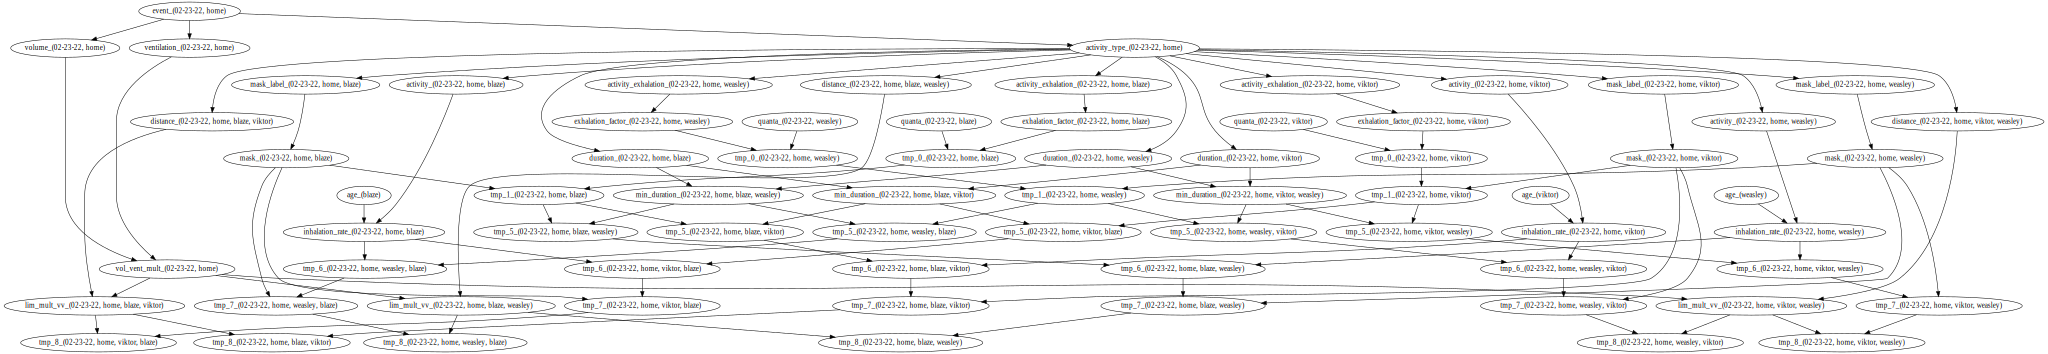

In [18]:
bn.graphviz_dag

In [20]:
logging.basicConfig(
    level=logging.DEBUG,
    filename="/Users/eugaddan/Developer/linx/linx_logs/log"
)

In [21]:
dates[0].strftime('%m-%d-%y')

'02-23-22'

In [ ]:

result = VE(
    network=bn,
    query=Query(
        outcomes=[f"tmp_8_{index_name(dates[0].strftime('%m-%d-%y'), 'home', 'blaze', 'viktor')}"],
        # givens=[
        #     {
        #         f'rapid_{date_self_suffix}': 1,
        #         f'rapid_{index_name(dates[0] + timedelta(days=1), person)}': 1
        #     }
        # ],
    )
).compute()

results.append(result.get_df())


numerator:  77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                           | 54/70 [00:57<01:24,  5.28s/it]

In [43]:
results[0]

,"tmp_8_(02-23-22, home, blaze, viktor)",value
0,0.0000,0.111356
1,0.0001,0.000836
2,0.0002,0.001492
3,0.0003,0.001763
4,0.0004,0.002993
5,0.0005,0.001149
6,0.0006,0.003989
7,0.0007,0.002374
8,0.0008,0.004808
9,0.0009,0.002084


<AxesSubplot:xlabel='tmp_8_(02-23-22, home, blaze, viktor)'>

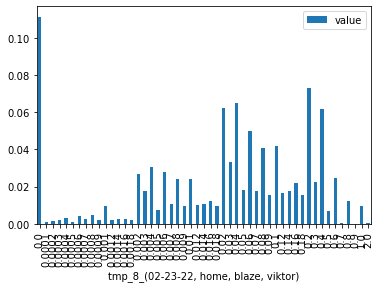

In [44]:
results[0].plot.bar(x='tmp_8_(02-23-22, home, blaze, viktor)', y='value')

<AxesSubplot:xlabel='tmp_8_(02-23-22, home, blaze, viktor)'>

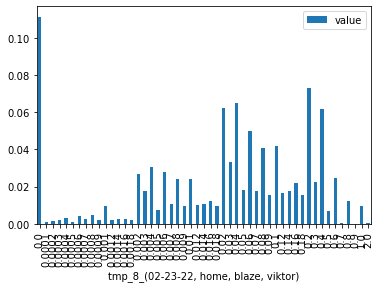

In [24]:
results[0].plot.bar(x='tmp_8_(02-23-22, home, blaze, viktor)', y='value')

In [24]:
# logging.basicConfig(
#     level=logging.DEBUG,
#     filename="/Users/eugaddan/Developer/linx/linx_logs/log"
# )
bayesian_network_1 = BN(graphviz_dag=graphviz.Digraph())

person = 'edderic'

dates = pd.date_range(start='02/23/2022', end='02/23/2022')

date = dates[0].strftime('%m-%d-%y')
date_person_event_suffix = index_name(date, person, 'work')
date_event_others_to_person = index_name(date, 'work', 'others', person)
date_event_self_suffix = index_name(date, 'work', person)
date_self_suffix = index_name(date, person)
day_index = index_name(date)
self_suffix = index_name(person)
outcome_col = f"dsi_{date_self_suffix}"

results = []

bn = bayesian_network_1

create_longitudinal(
    dates,
    person,
    bayesian_network=bayesian_network_1,
)

dictionary = {
    f"volume_{date_person_event_suffix}": {
        60: 1.0
    },
    f"ventilation_{date_person_event_suffix}": {
        4: 1.0
    },
    f"activity_exhalation_{date_event_others_to_person}": {
        "Resting - Speaking": 1.0
    },
    f"age_{self_suffix}": {
        '31 to <41': 1.0
    },
    f"activity_{date_event_self_suffix}": {
        'Sedentary/Passive': 1.0
    },
    f"duration_{date_event_others_to_person}": {
        5: 1.0
    },
    f"quanta_{date_event_others_to_person}": {
        50: 1.0
    },
    f"mask_quality_{date_event_others_to_person}": {
        0: 1.0
    },
    f"mask_{date_event_self_suffix}": {
        1.0: 1.0
    },
    f"perc_masked_{date_event_others_to_person}": {
        0: 1.0
    },
    f"num_positive_cases_{day_index}": {
        2000.0: 1.0
    },
    f"pop_size_{day_index}": {
        60_000_000: 1.0
    },
    f"num_days_inf_{day_index}": {
        10: 1.0
    },
    f"unreported_positive_{day_index}": {
        10: 1.0
    },
    f"num_people_seen_{date_event_others_to_person}": {
        30: 1.0
    },
}

bn.set_priors(
    dictionary=dictionary,
    data_class=InMemoryData,
)


In [18]:
from datetime import timedelta

In [19]:

result = VE(
    network=bn,
    query=Query(
        outcomes=[outcome_col],
        givens=[
            {
                f'rapid_{date_self_suffix}': 1,
                f'rapid_{index_name(dates[0] + timedelta(days=1), person)}': 1
            }
        ],
    )
).compute()

results.append(result.get_df())


numerator:  20%|█████████████████████████████████████████████▎                                                                                                                                                                                 | 24/118 [00:00<00:03, 31.33it/s]/Users/eugaddan/miniconda3/envs/linx_dev_env/lib/python3.9/site-packages/pandas/core/reshape/merge.py:1200: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  warnings.warn(
numerator:  30%|██████████████████████████████████████████████████████████████████▏                                                                                                                                                            | 35/118 [00:02<00:08,  9.86it/s]/Users/eugaddan/miniconda3/envs/linx_dev_env/lib/python3.9/site-packages/pandas/core/reshape/merge.py:1210: UserWarning: You are merging on int and float columns where the float values are not equal to their int 

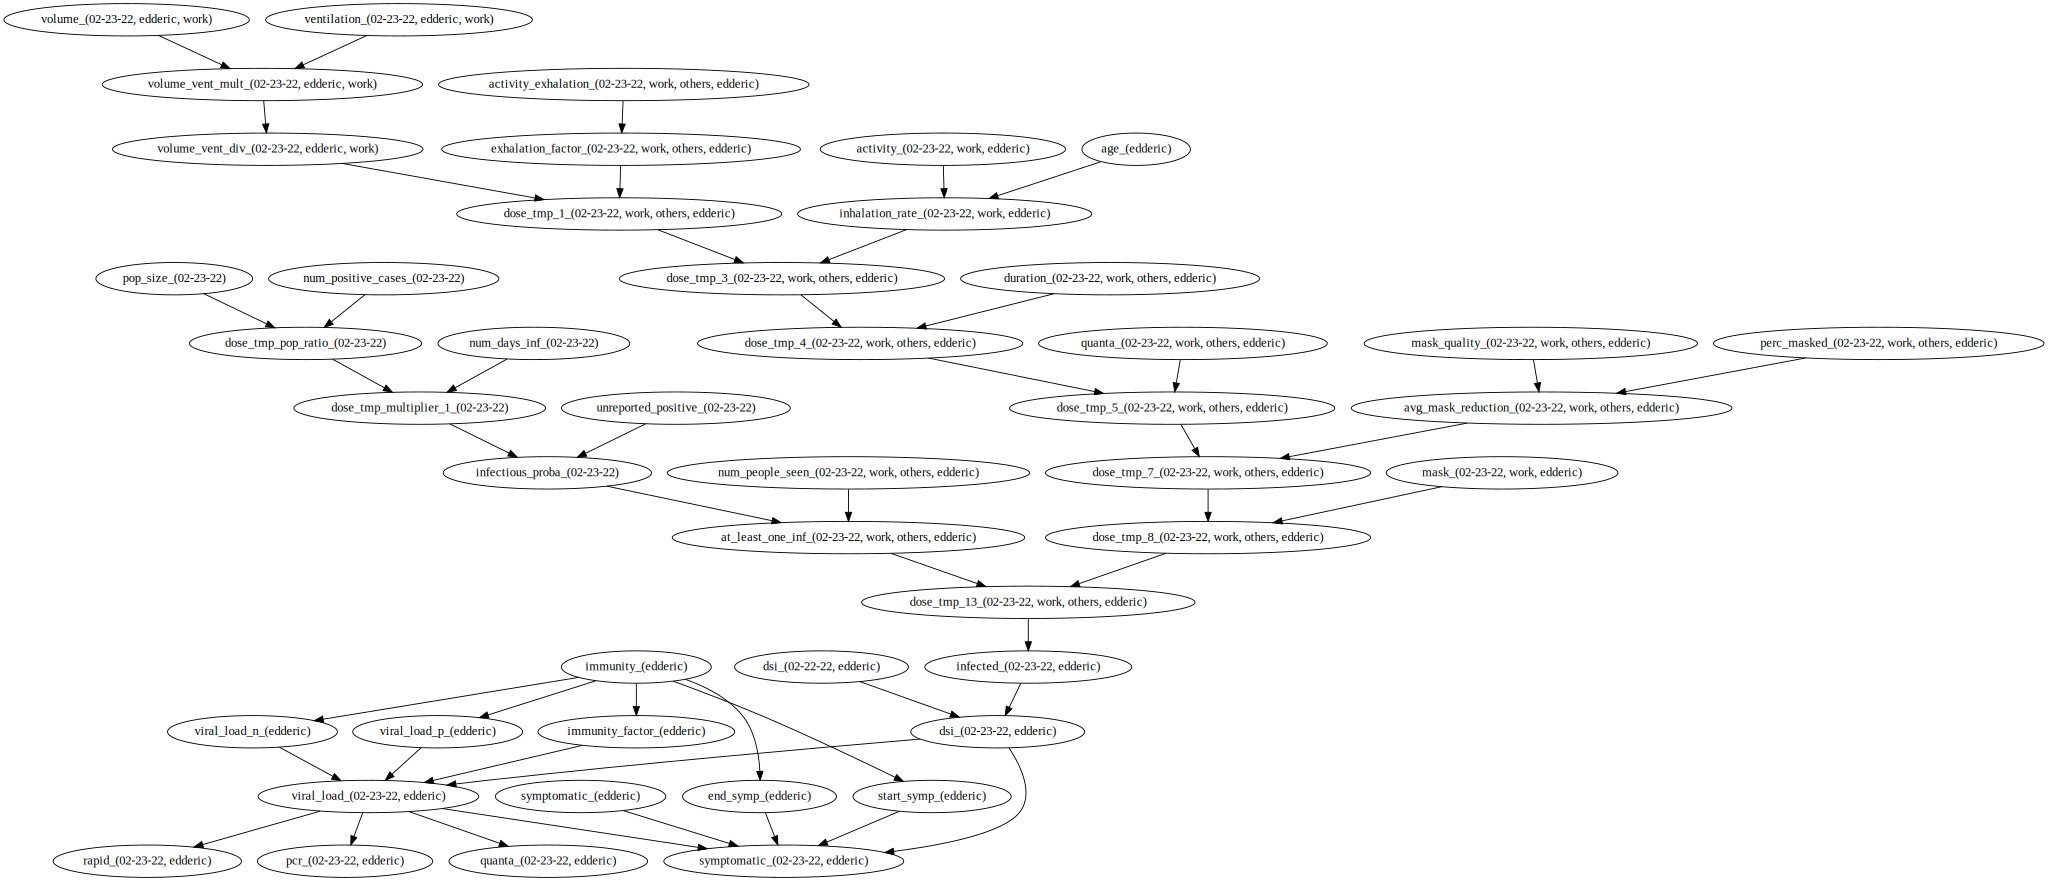

In [26]:
bayesian_network_1.graphviz_dag

In [47]:
results[-1]

,"dsi_(02-23-22, edderic)","rapid_(02-23-22, edderic)",value
0,0,1,0.003978
1,1,1,0.000142
2,2,1,0.001828
3,3,1,0.008692
4,4,1,0.044500
5,5,1,0.087690
6,6,1,0.123575
7,7,1,0.140073
8,8,1,0.140859
9,9,1,0.135116


In [44]:
results[1]

,"dsi_(02-23-22, edderic)","rapid_(02-23-22, edderic)",value
0,0,1,0.003824
1,1,1,0.000147
2,2,1,0.001985
3,3,1,0.012248
4,4,1,0.051881
5,5,1,0.099219
6,6,1,0.129710
7,7,1,0.141136
8,8,1,0.133848
9,9,1,0.128356


In [31]:
results[0]

,"dsi_(02-23-22, edderic)","pcr_(02-23-22, edderic)",value
0,0,1,0.001720
1,1,1,0.000066
2,2,1,0.020573
3,3,1,0.056881
4,4,1,0.081050
5,5,1,0.086621
6,6,1,0.083084
7,7,1,0.082862
8,8,1,0.080429
9,9,1,0.084630


<AxesSubplot:xlabel='dsi_(02-23-22, edderic)'>

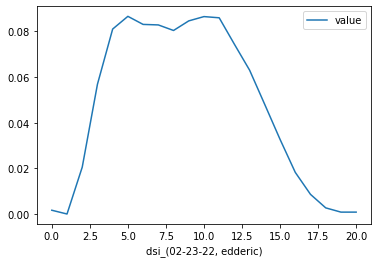

In [42]:
results[0][[f'dsi_{date_self_suffix}', 'value']].plot(x=f'dsi_{date_self_suffix}', y='value')

<AxesSubplot:xlabel='dsi_(02-23-22, edderic)'>

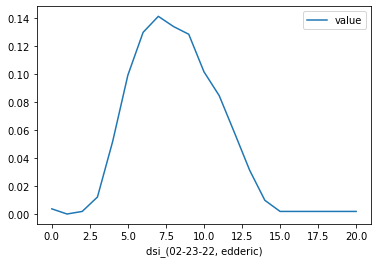

In [43]:
results[1][[f'dsi_{date_self_suffix}', 'value']].plot(x=f'dsi_{date_self_suffix}', y='value')

In [22]:
(1.0 - pd.Series([0.1, 0.05, 0.025])) ** pd.Series([5.0, 6.0, 7.0])


0    0.590490
1    0.735092
2    0.837592
dtype: float64

In [19]:
1.0 - (1.0 - pd.Series([1.0, 2.0, 3.0])) ** pd.Series([5.0, 6.0, 7.0])


0      1.0
1      0.0
2    129.0
dtype: float64

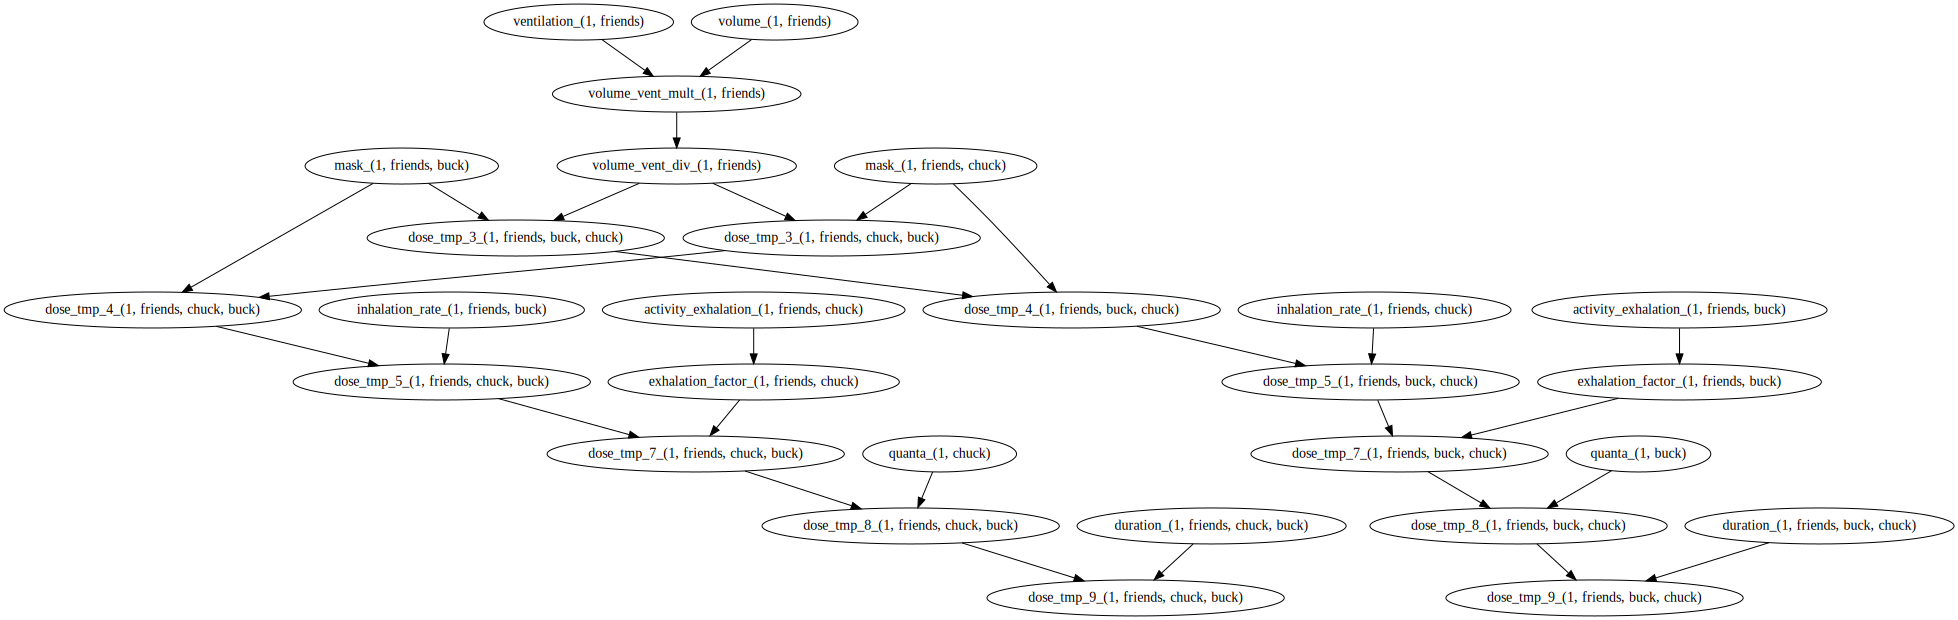

In [24]:
bayesian_network_2 = BN(graphviz_dag=graphviz.Digraph())

volume_vent_key, volume_vent_event_df = create_room_event(
    event_suffix=index_name(1, "friends"),
    bayesian_network=bayesian_network_2
)
create_doses(
    people=['chuck', 'buck'],
    time='1',
    event='friends',
    volume_vent_key=volume_vent_key,
    volume_vent_df=volume_vent_event_df,
    bayesian_network=bayesian_network_2
)



# person_time_index = index_name(
#     'friends',
#     '1',
#     'edderic'
# )

# df_2 = create_inhalation_factor(
#     breathing_rate_at_rest_unique=[0.288],
#     activity_specific_breathing_rate_unique=df[
#         f'activity_{person_time_index}'
#     ].unique(),
#     person='edderic',
#     time='1',
#     event='friends'
# )


bayesian_network_2.graphviz_dag
# df_2

In [17]:


create_doses(
    suffix=index_name('edderic', '1', 'work'),
    bayesian_network=bayesian_network
)

create_num_infected(
    suffix=index_name('edderic', '1', 'work'),
    bayesian_network=bayesian_network
)

TypeError: create_doses() got an unexpected keyword argument 'suffix'

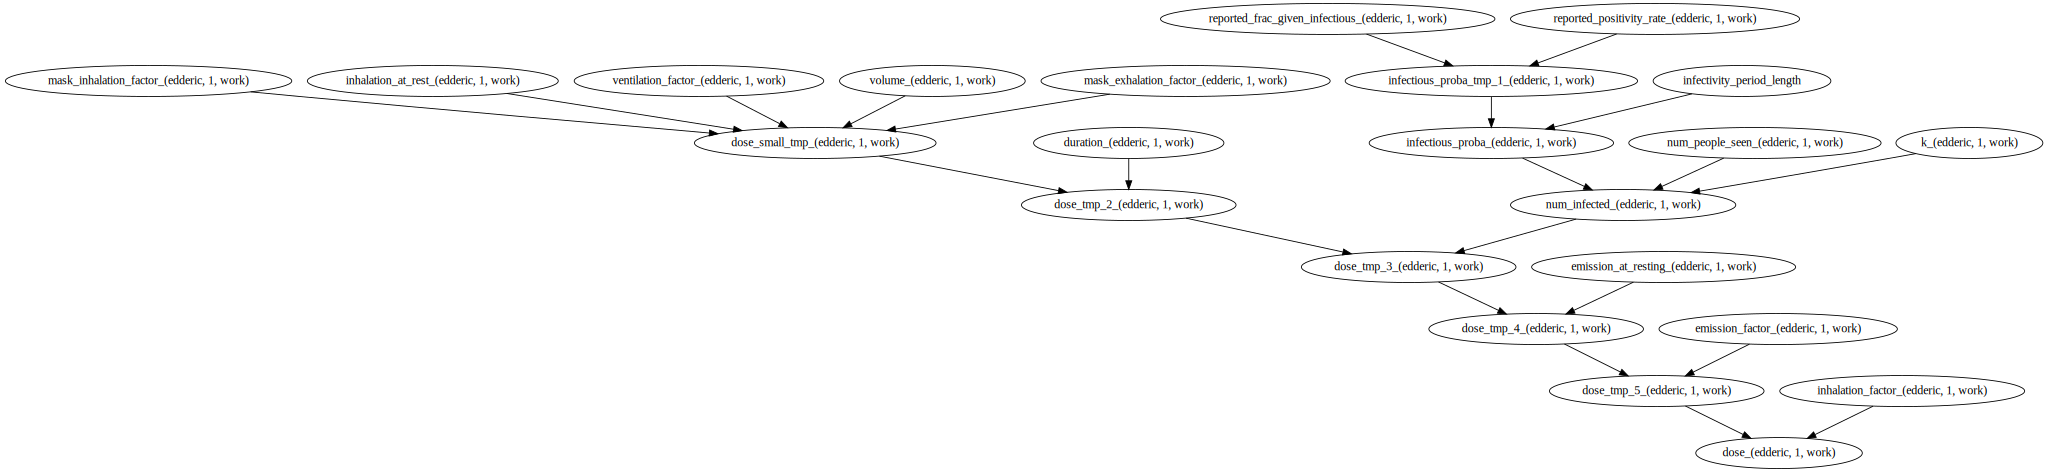

In [5]:
bayesian_network.graphviz_dag

In [10]:
import pytest
from pathlib import Path





def operate(a_list, b_list, operation, rounding=4):
    collection = []

    for a in a_list:
        for b in b_list:
            collection.append(
                {
                    "a": a,
                    "b": b,
                    "operation": round(
                        operation(a, b),
                        rounding
                    ),
                    "value": 1.0,
                }
            )
    return pd.DataFrame(collection)


def product(a_list, b_list, rounding=4):
    return operate(
        a_list, b_list, operation=lambda x, y: x * y, rounding=rounding
    )


def summation(a_list, b_list, rounding=4):
    return operate(
        a_list,
        b_list,
        operation=lambda x, y: x + y,
        rounding=rounding
    )


def rename_a_b(df, a, b, c):
    return df.rename(
        columns={
            "a": a,
            "b": b,
            "operation": c
        }
    )


def name(title, i, j=None, k=None):
    if i is not None and j is None and k is None:
        return f"{title}_({i})"
    if i is not None and j is not None and k is None:
        return f"{title}_({i}, {j})"
    if i is not None and j is not None and k is not None:
        return f"{title}_({i}, {j}, {k})"


def create_mask_fit_quality(
    mask_fits,
    mask_qualities,
    individual,
    time,
    categ,
    tag
):
    mask_factor = rename_a_b(
        df=product(mask_fits, mask_qualities),
        a=name(f"mask_{tag}_fit", individual, time, categ),
        b=name(f"mask_{tag}_quality", individual, time, categ),
        c=name(f"mask_{tag}_fit_quality", individual, time, categ),
    )

    mask_factor.loc[
        :,
        name(f"mask_{tag}_reduction_factor", individual, time, categ)
    ] = \
        1.0 - mask_factor[
            name(f"mask_{tag}_fit_quality", individual, time, categ)
        ]

    return mask_factor[
        [
            name(f"mask_{tag}_fit", individual, time, categ),
            name(f"mask_{tag}_quality", individual, time, categ),
            name(f"mask_{tag}_reduction_factor", individual, time, categ),
            'value'
        ]
    ]


def create_speech_breathe_ratio_conditional(
    speech_to_breathe_ratio,
    exposure_time_conditional,
    speech_multiplier,
    individual,
    time,
    categ
):
    speech_breathe_ratio = rename_a_b(
        product(
            speech_to_breathe_ratio,
            exposure_time_conditional[
                name(
                    "exposure",
                    individual,
                    time,
                    categ
                )
            ].unique()
        ),
        a=name(
            "speech_to_breathe_ratio",
            individual,
            time,
            categ
        ),
        b=name(
            "exposure",
            individual,
            time,
            categ
        ),
        c=name(
            "speech_to_breathe_ratio_prod_exposure_time_infected",
            individual,
            time,
            categ
        )
    )

    speech_breathe_ratio.loc[
        :,
        name(
            "speech_amplified",
            individual,
            time,
            categ
        )
    ] = \
        speech_breathe_ratio[
            name(
                "exposure",
                individual,
                time,
                categ
            )
        ] \
        * speech_breathe_ratio[
            name(
                "speech_to_breathe_ratio",
                individual,
                time,
                categ
            )
        ] \
        * speech_multiplier \
        + speech_breathe_ratio[
            name(
                "exposure",
                individual,
                time,
                categ
            )
        ] \
        * (1.0 - speech_breathe_ratio[
            name(
                "speech_to_breathe_ratio",
                individual,
                time,
                categ
            )
        ])

    speech_breathe_ratio.loc[
        :,
        name(
            "speech_amplified",
            individual,
            time,
            categ
        )
    ] = \
        speech_breathe_ratio[
            name(
                "speech_amplified",
                individual,
                time,
                categ
            )
        ].round(1)

    return speech_breathe_ratio[
            [
                name(
                    "speech_to_breathe_ratio",
                    individual,
                    time,
                    categ
                ),
                name(
                    "exposure",
                    individual,
                    time,
                    categ
                ),
                name(
                    "speech_amplified",
                    individual,
                    time,
                    categ
                ),
                "value"
            ]
        ]


def add_edge_to_bn(bn, df, outcome_var, storage_folder):
    givens = list(set(df.columns) - {'value', outcome_var})
    bn.add_edge(
        CPT(
            InMemoryData(
            # ParquetData(
                df,
                storage_folder
            ),
            givens=givens,
            outcomes=[outcome_var]
        )
    )


def create_mask_fit_quality_bn(
    storage_folder,
    bayesian_network,
    parameters,
    individual,
    time,
    categ,
):
    mask_exhalation_reduction = create_mask_fit_quality(
        parameters['mask_fits'],
        parameters['mask_qualities'],
        individual,
        time,
        categ,
        tag='exhalation'
    )

    add_edge_to_bn(
        bayesian_network,
        mask_exhalation_reduction,
        outcome_var=name(
            "mask_exhalation_reduction_factor",
            individual,
            time,
            categ
        ),
        storage_folder=storage_folder
    )

    return mask_exhalation_reduction


def create_masked_prod_num_infected_bn(
    storage_folder,
    bayesian_network,
    parameters,
    individual,
    time,
    categ,
    mask_exhalation_reduction,
):
    df = rename_a_b(
        df=product(
            mask_exhalation_reduction[
                name(
                    "mask_exhalation_reduction_factor",
                    individual,
                    time,
                    categ
                )
            ].
            unique(),
            parameters['num_masked_infected']
        ),
        a=name(
            "mask_exhalation_reduction_factor",
            individual,
            time,
            categ
        ),
        b=name(
            "num_masked_infected",
            individual,
            time,
            categ
        ),
        c=name(
            "masked_prod_num_infected",
            individual,
            time,
            categ
        )
    )

    add_edge_to_bn(
        bn=bayesian_network,
        df=df,
        outcome_var=name(
            "masked_prod_num_infected",
            individual,
            time,
            categ
        ),
        storage_folder=storage_folder
    )

    return df


def generate_dose_block(
    storage_folder,
    bayesian_network,
    parameters,
    individual,
    time,
    categ,
):
    mask_exhalation_reduction = create_mask_fit_quality_bn(
        storage_folder,
        bayesian_network,
        parameters,
        individual,
        time,
        categ,
    )

    masked_prod_num_infected = create_masked_prod_num_infected_bn(
        storage_folder,
        bayesian_network,
        parameters,
        individual,
        time,
        categ,
        mask_exhalation_reduction,
    )

    infected_tmp = rename_a_b(
        df=summation(
            masked_prod_num_infected[
                name(
                    "masked_prod_num_infected",
                    individual,
                    time,
                    categ
                )
            ].unique(),
            parameters['num_unmasked_infected']
        ),
        a=name(
            "masked_prod_num_infected",
            individual,
            time,
            categ
        ),
        b=name(
            "num_unmasked_infected",
            individual,
            time,
            categ
        ),
        c=name(
            "masked_prod_num_infected_plus_num_unmasked_infected",
            individual,
            time,
            categ
        )
    )

    add_edge_to_bn(
        bn=bayesian_network,
        df=infected_tmp,
        outcome_var=name(
            "masked_prod_num_infected_plus_num_unmasked_infected",
            individual,
            time,
            categ
        ),
        storage_folder=storage_folder
    )

    exposure_time_conditional = rename_a_b(
        df=product(
            infected_tmp[
                name(
                    "masked_prod_num_infected_plus_num_unmasked_infected",
                    individual,
                    time,
                    categ
                )
            ].unique(),
            parameters['exposure_work']
        ),
        a=name(
            "masked_prod_num_infected_plus_num_unmasked_infected",
            individual,
            time,
            categ
        ),
        b=name(
            "exposure_work",
            individual,
            time,
            categ
        ),
        c=name(
            "exposure",
            individual,
            time,
            categ
        )
    )

    add_edge_to_bn(
        bn=bayesian_network,
        df=exposure_time_conditional,
        outcome_var=name(
            "exposure",
            individual,
            time,
            categ
        ),
        storage_folder=storage_folder
    )

    speech_breathe_ratios = create_speech_breathe_ratio_conditional(
        parameters['speech_to_breathe_ratio'],
        exposure_time_conditional,
        parameters['speech_multiplier'],
        individual,
        time,
        categ
    )

    add_edge_to_bn(
        bn=bayesian_network,
        df=speech_breathe_ratios,
        outcome_var=name(
            "speech_amplified",
            individual,
            time,
            categ
        ),
        storage_folder=storage_folder
    )

    ventilation_reduction = rename_a_b(
        df=product(
            speech_breathe_ratios[
                name(
                    "speech_amplified",
                    individual,
                    time,
                    categ
                )
            ].unique(),
            parameters['ventilation_reductions']
        ),
        a=name(
            "speech_amplified",
            individual,
            time,
            categ
        ),
        b=name(
            "ventilation_reduction",
            individual,
            time,
            categ
        ),
        c=name(
            "ventilation_reduced",
            individual,
            time,
            categ
        )
    )

    add_edge_to_bn(
        bn=bayesian_network,
        df=ventilation_reduction,
        outcome_var=name(
            "ventilation_reduced",
            individual,
            time,
            categ
        ),
        storage_folder=storage_folder
    )

    mask_inhalation_reduction = create_mask_fit_quality(
        parameters['mask_fits'],
        parameters['mask_qualities'],
        individual,
        time,
        categ,
        tag='inhalation'
    )

    add_edge_to_bn(
        bn=bayesian_network,
        df=mask_inhalation_reduction,
        outcome_var=name(
            "mask_inhalation_reduction_factor",
            individual,
            time,
            categ
        ),
        storage_folder=storage_folder
    )

    dose = rename_a_b(
        df=product(
            mask_inhalation_reduction[
                name(
                    "mask_inhalation_reduction_factor",
                    individual,
                    time,
                    categ
                )
            ].unique(),
            ventilation_reduction[
                name(
                    "ventilation_reduced",
                    individual,
                    time,
                    categ
                )
            ],
            rounding=1
        ),
        a=name(
            "mask_inhalation_reduction_factor",
            individual,
            time,
            categ
        ),
        b=name(
            "ventilation_reduced",
            individual,
            time,
            categ
        ),
        c=name(
            "dose",
            individual,
            time,
            categ
        )
    )

    add_edge_to_bn(
        bn=bayesian_network,
        df=dose.drop_duplicates(),
        outcome_var=name(
            "dose",
            individual,
            time,
            categ
        ),
        storage_folder=storage_folder
    )

    return {
        'dose': dose,
        'mask_inhalation_reduction': mask_inhalation_reduction,
        'ventilation_reduction': ventilation_reduction,
        'speech_breathe_ratios': speech_breathe_ratios,
        'exposure_time_conditional': exposure_time_conditional,
        'infected_tmp': infected_tmp,
        'masked_prod_num_infected': masked_prod_num_infected,
        'mask_exhalation_reduction': mask_exhalation_reduction
    }


In [5]:
%%bash

rm -r tmp
mkdir tmp

In [11]:
bayesian_network = BN(
    graphviz_dag=graphviz.Digraph()
)

storage_folder = get_tmp_path()
clean_tmp(storage_folder)

parameters = {
    'mask_qualities': [0.4, 0.8, 0.95, 0.99],
    'mask_fits': [0.5, 0.9, 0.99],
    'num_masked_infected': list(range(10)),
    'num_unmasked_infected': list(range(10)),
    'exposure_work': [0.25, 0.5, 1, 2, 4, 8, 16, 24],
    'speech_to_breathe_ratio': [
        0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1
    ],
    'ventilation_reductions': [0.2, 0.4, 0.6, 0.8, 1.0],
    'speech_multiplier': 1.5,
}

dose_block_dfs = generate_dose_block(
    storage_folder,
    bayesian_network,
    parameters=parameters,
    individual='edderic',
    time='1',
    categ='work'
)

result_1 = VE(
    bayesian_network,
    query=Query(
        outcomes=[
            name('dose', i='edderic', j=1, k='work')
        ],
        givens=[
            {
                name(
                    'num_unmasked_infected',
                    i='edderic',
                    j=1,
                    k='work'
                ): 2,
                name(
                    'num_masked_infected',
                    i='edderic',
                    j=1,
                    k='work'
                ): 0
            }
        ]
    )
).compute()

result_2 = VE(
    bayesian_network,
    query=Query(
        outcomes=[
            name('dose', i='edderic', j=1, k='work')
        ],
        givens=[
            {
                name(
                    'num_unmasked_infected',
                    i='edderic',
                    j=1,
                    k='work'
                ): 0,
                name(
                    'num_masked_infected',
                    i='edderic',
                    j=1,
                    k='work'
                ): 2
            }
        ]
    )
).compute()

result_1_df = result_1.get_df()
result_2_df = result_2.get_df()


denominator: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 187.34it/s]


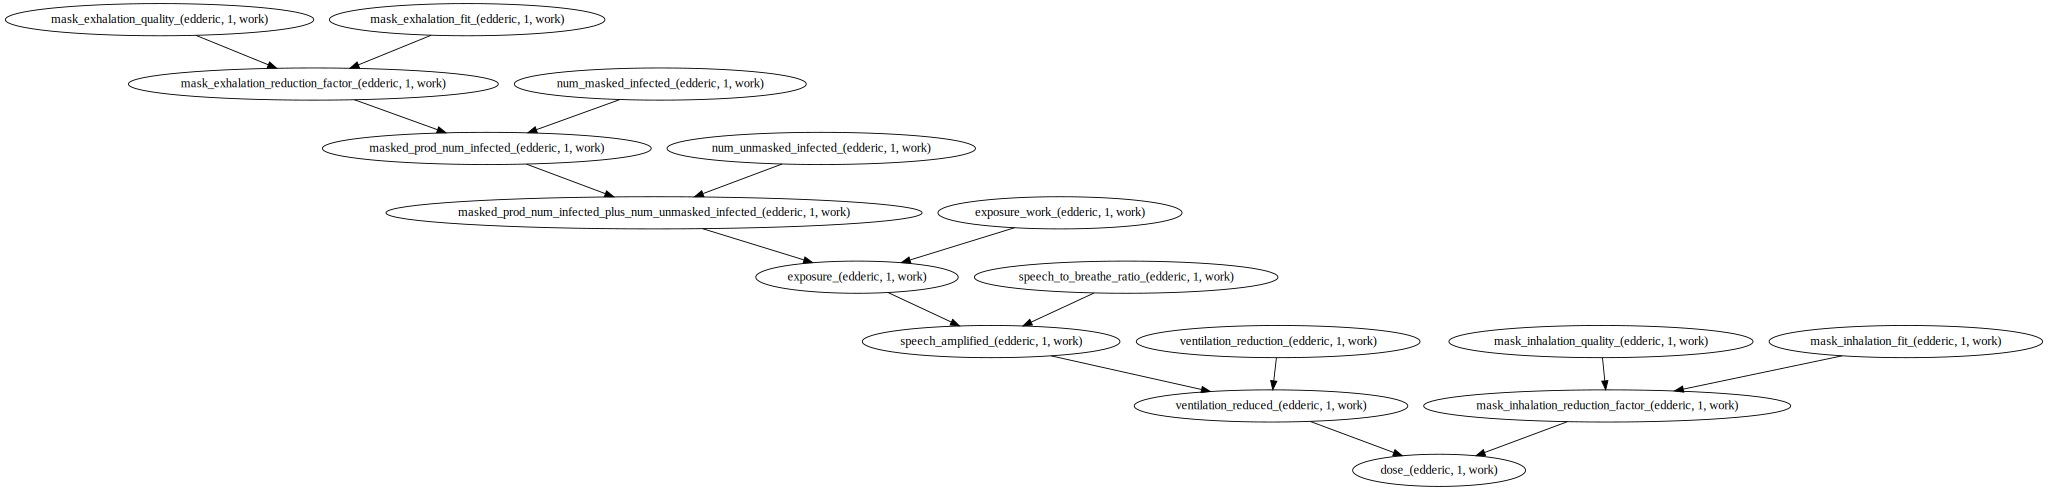

In [12]:
bayesian_network.graphviz_dag

In [14]:
dose_block_dfs.keys()

dict_keys(['dose', 'mask_inhalation_reduction', 'ventilation_reduction', 'speech_breathe_ratios', 'exposure_time_conditional', 'infected_tmp', 'masked_prod_num_infected', 'mask_exhalation_reduction'])

In [18]:
dose_block_dfs['dose']['dose_(edderic, 1, work)'].unique().shape

(3222,)

In [9]:
name('dose', i='edderic', j=1)

'dose_(edderic, 1)'

In [10]:
result = VE(
    bayesian_network,
    query=Query(
        outcomes=[name('dose', i='edderic', j=1, k='work') ],
        given=[
            {
                'mask_wearing': 90%
            }
        ] 
    )
).compute()

result_df = result.get_df()
result_df

denominator: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 5047.30it/s]


AttributeError: 'NoneType' object has no attribute 'log_factor'

In [221]:
pd.DataFrame([{'a': 1}, {'a': 1}]).drop_duplicates()

,a
0,1
